[View in Colaboratory](https://colab.research.google.com/github/Con-Mi/Pattern-Recognition-and-Machine-Learning/blob/master/Unsupervised_Learning_PCA.ipynb)

## Dimensionality reduction and  clustering with Principal Component Analysis.


## Importind data, amd packages.

First I import the necessary packages and a dataset for demonstrating the dimensionality reduction. 

In [0]:
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
iris_df = pd.DataFrame(X, columns = feature_names)
iris_df['labels'] = y

A preview of the data in a frame.

In [176]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Principal Component Analysis

Consider that your data matrix is in the form of $X$ $\epsilon$ $\!R^{nxp}$, where $n$ stands for the data samples and $p$ for the columns of the data. The the Covariance matrix of the data is constructed as $Cov(X) = \frac{1}{n-1} X^TX$.

Then the covariance matrix is symmetric and positive semidefinite, which means that its eigenvalues are all $\lambda_i>=0$.

Then the decomposiiton of the matrix $VLV^T>=0$ exists, with an $L$ a diagonal matrix with the eigenvalues of the covariance matrix on its main diagonal. 

In [0]:
# Constructing the Covariance matrix, as specified above.

cov_matr = (np.dot(X.T, X)) /(X.shape[0]-1)

Then we need to get the eigenvalues and eigenvectors of the Covariance matrix.

In [0]:
# Getting Eigenvalues and Eigenvectors from the Covriance matrix
## evalues = eigenvalues
## evectors = eigenvectors

evalues, evectors = np.linalg.eig(cov_matr)

Now the above code will produce four eigenvalues, ranked as highest to lowest, with its corresponding eigenvectors as columns.

To get the explained variance of the data from eigenvalues, we can calculate it as:
$ V_{percentage} = \frac{4*(\lambda_1 + \lambda_2 +\lambda_3 +..)}{4*(\sum_{i \epsilon \!N} \lambda_i)}$

In [0]:
# evaluating the strength of each principal component from its corresponding eigenvalue

explained_variance_ratio = []
for i in range(len(evalues)+1):
  explained_variance_ratio.append(( 4*np.sum(evalues[0:i]) ) / ( 4*np.sum(evalues) ))  # Produces a list of the Explained Variance ratio.

In [158]:
dictionary = {'One component': explained_variance_ratio[1], 'Two components': explained_variance_ratio[2], 'Three Components': explained_variance_ratio[3], 'Four Components': explained_variance_ratio[4]}
comp_df = pd.DataFrame.from_dict(dictionary, orient = 'index')
print("Eplained Variance with number of Principal Components.")
comp_df.head()  # Making it to a dataframe for visualization purposes. 

Eplained Variance with number of Principal Components.


,0
One component,0.965430
Two components,0.998368
Three Components,0.999630
Four Components,1.000000


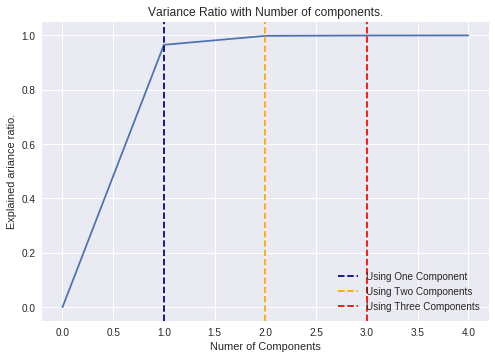

In [164]:
# Plotting the Variance with the number of components.

x_axis = range(5)
plt.figure()
plt.plot(x_axis, explained_variance_ratio[1:])
plt.axvline(1, linestyle = '--', c = 'navy', label = 'Using One Component')
plt.axvline(2, linestyle = '--', c = 'orange', label = 'Using Two Components')
plt.axvline(3, linestyle = '--', c = 'red', label = 'Using Three Components')
plt.xlabel("Numer of Components")
plt.ylabel("Explained Variance ratio, Percentage.")
plt.title("Variance Ratio with Number of Components.")
plt.legend()
plt.show()

## Plotting results of the dimensionality reduction.

Now that we have an idea of the components, we can select how many we want. I select the first two principal components, and produce scatter plots of them. The first two components give ~0.99% of explained variance.

The first two components are given as:

  1st Component : $PC_1 = X * V[0]$ , which is the eigenvector that corresponds to the highest eiganvalue.
  
  2nd Component : $PC_2 = X * V[1]$ , which is the eigenvector that corresponds to the second highest eiganvalue.

In [0]:
# Projections of the data X to the first and second principal component.

firs_pc = np.dot(X, evectors[:, 0])  # First Component
sec_pc = np.dot(X, evectors[:, 1])   # Second Component

First I plot the first two principal components, as a scatter plot.

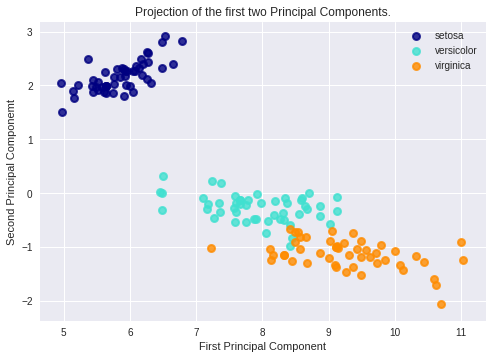

In [67]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(firs_pc[y == i], sec_pc[y == i], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Componemt")
plt.title("Projection of the first two Principal Components.")
plt.show()

Since just one component gives 96% of the explained variance, then I just plot one component to see if the method produces meaningful results.

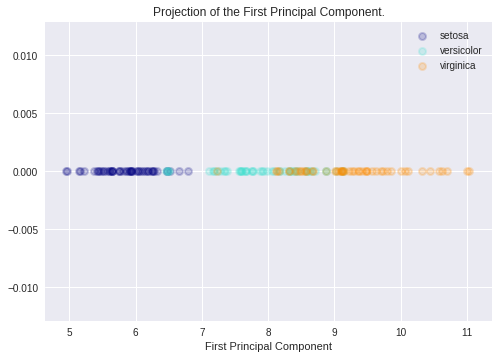

In [68]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

s_pc = np.zeros(150)

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(firs_pc[y == i], s_pc[y==i], color=color, alpha=.2, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("First Principal Component")
plt.title("Projection of the First Principal Component.")
plt.show()

In practice Covariance matrix construction and eigenvalue decomposition is never used du to its computational complexity. More advanced iterative methods are considered. 

## Using ready made software for Principal Component Analysis.

In [0]:
from sklearn.decomposition import PCA   # The sklearn package contains various machine learning algorithms.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd


wine_data = load_wine() # load wine data
X_wine = wine_data.data
y_wine = wine_data.target
wine_target_names = wine_data.target_names
wine_feature_names = wine_data.feature_names
wine_df = pd.DataFrame(X_wine, columns=wine_feature_names)
wine_df['labels'] = y_wine

In [191]:
print("Wine Classification Labels.")
print(wine_target_names)

Wine Classification Labels.
['class_0' 'class_1' 'class_2']


In [192]:
print("A view of the data.")
wine_df.head()

A view of the data.


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [0]:
std_scale = StandardScaler()  # Specifying the standard scaler function.
pca_ = PCA()
X_reduced_ = pca_.fit(std_scale.fit_transform(X_wine))

In [212]:
print("Printing the strength of each component.")
print(X_reduced_.explained_variance_ratio_)

Printing the strength of each component
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


Text(0.5,1,'Ploting the strength of components')

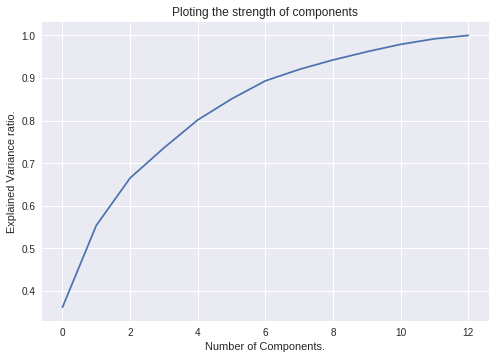

In [214]:
explained_var_ratio = []
add_sum = 0
for tmp_var in X_reduced_.explained_variance_ratio_:
  add_sum += tmp_var
  explained_var_ratio.append(add_sum) # I am incrementing the sum and add it to the list.

# Ploting the strength of components.

plt.plot(explained_var_ratio)
plt.xlabel("Number of Components.")
plt.ylabel("Explained Variance ratio.")
plt.title("Ploting the strength of components")

In [219]:
dictionary_ = dict({"1 Component": explained_var_ratio[0], "2 Component": explained_var_ratio[1], "3 Component": explained_var_ratio[2] , "4 Component": explained_var_ratio[3] , "5 Component": explained_var_ratio[4] , "6 Component": explained_var_ratio[5] , "7 Component": explained_var_ratio[6] , "8 Component": explained_var_ratio[7] , "9 Component": explained_var_ratio[8] , "10 Component": explained_var_ratio[9], "11 Component": explained_var_ratio[10], "12 Components": explained_var_ratio[-1]})
expl_var_df = pd.DataFrame.from_dict(dictionary_, orient = 'index')
print("Eplained Variance with number of Principal Components.")
expl_var_df  # Making it to a dataframe for visualization purposes. 

Eplained Variance with number of Principal Components.


,0
1 Component,0.361988
2 Component,0.554063
3 Component,0.665300
4 Component,0.735990
5 Component,0.801623
6 Component,0.850981
7 Component,0.893368
8 Component,0.920175
9 Component,0.942397
10 Component,0.961697


In [0]:
pca = PCA(n_components = 2)   # Specifying how many components I need from the data.
X_reduced = pca.fit_transform(std_scale.fit_transform(X_wine)) # Here I am scaling the data by removing the mean and zero variance.

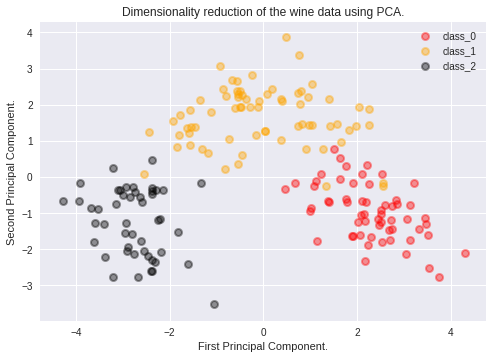

In [207]:
plt.figure()
colors = ['red', 'orange', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], wine_target_names):
    plt.scatter(X_reduced[y_wine == i, 0], X_reduced[y_wine == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.title("Dimensionality reduction of the wine data using PCA.")
plt.xlabel("First Principal Component.")
plt.ylabel("Second Principal Component.")
plt.legend()
plt.show()